## Presentación Intermedia

### Alumno: Juan Carlos Aldape Pier
### Matrícula: A01411434

### Introducción

En este caso trabajaré con una base de datos de las peliculas mas taquilleras desde el año 1977 hasta el 2019. Son un total de 430 filas, con un total de 14 columnas. Estos datos fueron obtenidos de la página de Kaggle. Este documento cuenta con un gran número de peliculas, que han representado grandes exitos en el cine antiguo y moderno.

Primeramente quisiera explicar que los datos estan basados en calificaciones, el costo de la pelicula, cuanto se vendio de dicha pelicula, compañia entre algunos otros valores interesantes.

#### A continuación necesito importar tanto pandas como numpy

In [1]:
import pandas as pd
import numpy as np

#### Posteriormente necesito instalar seaborn para futuras operaciones

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

Una ves teniendo esto, procedo a traer la base de datos, cuyo nombre es "Blockbusters_2019-1977.cvs"

In [4]:
%ls

 00_00_binder.ipynb
 00_00_primer_pasos.ipynb
 01_01_data_types.ipynb
 01_02_read_iloc_unique_groupby.ipynb
 02_00_data_wrangling.ipynb
 02_01_null_display.ipynb
 02_02_basic_math.ipynb
 A01411434_pres_casifinal.ipynb
'A01411434_pres_interm (1)-Copy1.ipynb'
'A01411434_pres_interm (1).ipynb'
 A01411434_pres_interm.ipynb
 A3_A01411434.ipynb
 A5_A01411434.ipynb
 A7_A01411434.ipynb
 A9_A01411434.ipynb
 adult.csv
 antropometria-dataset-2.csv
 Blockbusters_2019-1977.csv
 _clase1.ipynb
 Clase3.ipynb
 Clase4.ipynb
 Clase5.ipynb
 Clase7.ipynb
 Clase8.ipynb
 Clase9.ipynb
'countries of the world.csv'
 datasets/
 Presentación_Intermedia_A01411434.ipynb
'Presentación Intermedia.ipynb'
 README.md
 reg_data.csv
 requirements.txt


In [5]:
df = pd.read_csv('Blockbusters_2019-1977.csv',encoding = 'unicode_escape')
df.head()

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy
3,2019,4,7.6,PG-13,Spider-Man: Far from Home,"160,000,000",129,Sony Pictures,"1,131,927,996","390,532,085",Action,Adventure,Sci-Fi
4,2019,5,6.9,PG-13,Captain Marvel,"175,000,000",123,Walt Disney,"1,128,274,794","426,829,839",Action,Adventure,Sci-Fi


#### A continuación las diferentes columnas que fui encontrando

In [6]:
df.columns

Index(['release_year', 'rank_in_year', 'imdb_rating', 'mpaa_rating',
       'film_title', 'film_budget', 'length_in_min', 'domestic_distributor',
       'worldwide_gross', 'domestic_gross', 'genre_1', 'genre_2', 'genre_3'],
      dtype='object')

Para entender mejor el comportamiento de cada variable de las que tengo identificadas y conocer su tipo lo he divido de forma simple

#### Las variables categóricas serían: 
* rank_in_year
* film_title
* domestic_distributor
* genre_1
* genre_2
* genre_3.
#### Las variables numéricas serían: 
* release_year
* imdb_rating
* lenght_in_min.

Para este caso existieron unas variables que por temas de formato tuve que convertir a string (categóricas), que fueron: 

* film_budget
* worldwide_gross 
* domestic_gross

Estas realmente no las tomo tanto en cuenta dentro de mi análisis

Para entender un poco mejor esas variables, se tratan principalmente del año de salida de la pelicula, el ranking del 1 al 10 de ese año, la califcación obtenida en IMDB, la categoría de la pelicula, el nombre de la pelicula, cuanto costo hacerla, cuanto dura la pelicula, quien la produce, ventas en el mundo y en USA y el género.


### Una pequeña explicación de cada variable sería la siguiente

* release_year = Año en el que salio dicha película

* rank_in_year = El numero que le corresponde del top 10 de dicho año

* imdb_rating = La calificación obtenida en el IMDB que va de escala del 1-10

* mpaa_rating = Es la clasificación de la pelicula para conocer que edad publico tiene

* film_title = Nombre de la pelicula

* film_budget = Cuanto costo realizar la pelicula

* lenght_in_min = Tiempo de duración de la pelicula en minutos

* domestic_distributor = Compañia que creo la película


#### Los demas datos no los tome en cuenta para el análisis

Primeramente como dato me gustaría a mi saber cual es la media de la duración de las peliculas que se encuentran dentro del top, para esto realizaré una tabla pivote, que me muestra la media de las peliculas rankeadas como la 1, la 2 y así sucesivamente

In [7]:
my_pivot = pd.pivot_table(df,
                          index = 'rank_in_year',
                          values = ['length_in_min'],
                          aggfunc = 'mean'
                         )
my_pivot

,length_in_min
rank_in_year,
1,135.744186
2,127.790698
3,117.906977
4,124.000000
5,115.976744
6,118.790698
7,116.116279
8,111.418605
9,120.627907


## Pregunta de investigación 1: ¿Como puede saber que longitudes (minutos de duración de pelicula) se repiten mas?
Para esto realizo un histograma para conocer cuales son los valores de longitud de la pelicula que mas se pueden observar dentro de la lista brindada.

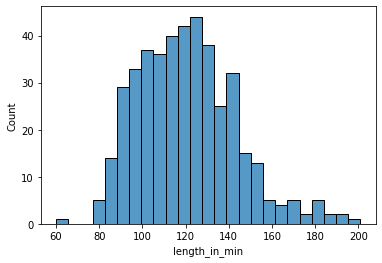

In [8]:
sns.histplot(df['length_in_min'],
             kde = False,
             bins = 25)

## Como conclusión 
Puedo determinar que la mayoría de las peliculas tienen una duración entre 100-130 minutos aproximadamente.

## Pregunta de investigación 2: ¿Cual es el promedio por año de las peliculas, en cuestión del rating?, ¿que debo de hacer? 

Tendría que hacer uso del valor de 'imdb_rating' debido a que me interesa conocer cual es el promedio de las califiaciones de las mejores peliculas, en todos los años, y para eso realizo lo siguiente:

In [9]:
my_pivot = pd.pivot_table(df,
                          index = 'release_year',
                          values = ['imdb_rating'],
                          aggfunc = 'mean'
                         )
my_pivot

,imdb_rating
release_year,
1977,7.12
1978,7.00
1979,6.99
1980,6.89
1981,7.08
1982,7.07
1983,6.50
1984,7.21
1985,7.27


## Conclusión a la pregunta
Me logro dar cuenta que el mejor "top 10" se dio dentro del año 1991, y le sigue el 2019, lo que habla bien tanto de las peliculas tanto antiguas como las modernas, y que se mantienen todas en un rango entre los 6 altos y los 7 bajos (6-5-7.5), debido a que este sistema es algo estricto. 

## Pregunta de investigación 3: ¿Existen valores atípicos en el rating de la peliculas? 

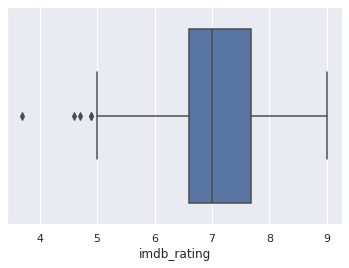

In [36]:
sns.boxplot(x = df['imdb_rating'],
           )

## Conclusión a la pregunta
Me logro dar cuenta que existen 4 valores que si se encuentran por debajo del rango que existe en esta boxplot, por lo que son valores que se podrían separar de esta lista, ya que se espera que sean buenas peliculas, y estas son calificaciones bajas

## Pregunta de investigación 4: ¿Existen relación entre el costo de las películas y el rating que logran obtener? 


In [11]:
my_pivot = pd.pivot_table(df,
                          index = 'film_budget',
                          values = ['imdb_rating'],
                          aggfunc = 'mean'
                         )
my_pivot.head(50)

,imdb_rating
film_budget,
"10,000,000",6.720000
"10,500,000",7.800000
"10,700,000",7.300000
"100,000,000",6.544444
"102,000,000",8.050000
"103,000,000",8.500000
"11,000,000",7.380000
"11,200,000",7.700000
"110,000,000",6.412500


## Conclusión a la pregunta: 
De este apartado que no existe una relación tan directa entre el dinero que se invierte para una pelicula, con la calificación que puede llegar a obtener, ya que puedes invertir mucho y que tu pelicula no sea tan bien calificada, o puedes invertir poco y que tu pelicula guste al público

## Pregunta de investigación 5: ¿Como se puede observar cuanta duración tienen las peliculas, dependiendo el rating y su clasificación? 
Para esto es necesario crear un gráfico de dispersión

In [12]:
import matplotlib.pyplot as plt

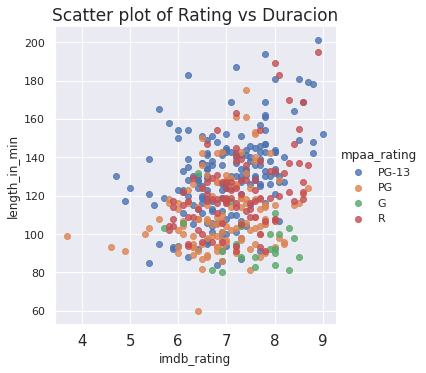

In [33]:
sns.lmplot (x = 'imdb_rating',
            y= 'length_in_min',
            data = df,
            fit_reg = False,
            hue = 'mpaa_rating'
           )
plt.title('Scatter plot of Rating vs Duracion', fontsize = 17)
plt.xticks(fontsize = 15)
plt.show()

### Observaciones
Puedo notar que la mayoría de los valores que son de PG-13, tienen una duración extensa, al igual que puedo notar que los G tienen una duración corta
## Conclusión a la pregunta: 
Las peliculas dependiendo de su rating, se pueden o no relacionar con el tipo de clasificación que acepta, y a su ves, estan mas o menos en el mismo rango de duración. 

## Pregunta de investigación 6: ¿Como puedo yo determinar la calificación obtenida en cada año, tomando en cuenta que quiero clasificarlo por el ranking y por cada año?

 Para eso lo que realicé, fue sencillamente una tabla pivote como se puede ver a continuación, y posteriormente realizar un boxplot para poder ver por ejemplo los datos del primer año, y así darme una idea de como se comporta

In [14]:
my_pivot2 = pd.pivot_table(df,
                          index = 'release_year',
                          values = ['imdb_rating'],
                          aggfunc = 'mean',
                          columns = 'rank_in_year'
                         )
my_pivot2

imdb_rating                                             
rank_in_year          1    2    3    4    5    6    7    8    9    10
release_year                                                         
1977                 8.6  7.6  6.8  7.0  7.4  6.2  7.1  6.6  8.0  5.9
1978                 7.2  7.3  5.8  7.5  6.4  6.9  6.3  6.7  8.1  7.8
1979                 6.3  7.8  8.4  5.8  6.2  7.3  6.4  8.4  6.1  7.2
1980                 8.7  7.9  6.8  6.8  7.7  6.2  6.2  7.5  5.3  5.8
1981                 8.4  7.6  6.8  6.9  6.9  6.3  7.2  6.8  6.9  7.0
1982                 7.8  7.4  7.0  7.7  6.8  7.3  6.2  7.7  6.9  5.9
1983                 7.0  7.4  6.2  7.5  3.7  7.1  6.6  6.6  8.3  4.6
1984                 7.6  7.3  7.8  7.3  7.2  6.9  6.7  6.6  8.0  6.7
1985                 8.5  6.9  6.5  7.2  6.1  7.8  6.7  7.4  7.8  7.8
1986                 6.9  6.6  8.1  8.3  6.0  7.3  6.0  6.6  6.9  6.0
1987                 6.9  6.5  7.0  6.0  7.3  7.6  6.5  7.8  7.1  7.9
1988                 8.0  7.7  7.0  5.6  8.1  6.1  5.8  5.9  7.3  8.2
1989                 8.2  7.5  7.8  5.9  7.2  6.3  6.6  7.6  7.2  6.8
1990                 7.0  7.6  7.0  8.0  7.5  7.4  7.2  6.9  6.8  6.1
1991                 8.5  6.9  8.0  6.8  8.6  8.0  6.9  7.3  6.8  6.7
1992                 8.0  6.3  6.7  7.0  6.7  7.0  7.7  6.4  7.4  7.0
1993                 8.1  7.0  7.8  8.9  6.8  5.9  6.4  6.8  7.7  6.6
1994                 8.5  8.8  7.2  6.9  7.2  4.9  7.3  7.0  7.6  6.9
1995                 7.6  8.3  7.6  7.2  6.7  5.4  8.6  6.1  6.2  7.0
1996                 7.0  6.4  7.1  7.4  6.9  5.7  6.6  5.6  7.3  6.1
1997                 7.8  6.6  7.3  6.5  6.5  7.7  6.9  6.3  7.7  7.2
1998                 6.7  8.6  5.4  7.1  7.2  6.2  7.6  5.4  7.1  6.6
1999                 6.5  8.1  7.9  8.7  7.3  7.0  7.1  6.4  8.3  6.6
2000                 6.1  8.5  7.8  6.4  6.5  6.1  7.0  6.4  7.4  6.6
2001                 7.6  8.8  8.0  7.8  7.8  6.2  6.3  5.9  5.7  6.8
2002                 8.7  7.4  7.3  6.5  6.2  6.1  6.7  7.5  6.5  7.6
2003                 8.9  8.1  7.2  8.0  6.7  7.7  6.3  6.7  7.4  6.6
2004                 7.2  7.9  7.3  8.0  7.1  6.4  6.3  7.2  6.0  6.5
2005                 7.7  7.5  6.9  6.5  7.2  6.9  6.5  6.6  8.2  6.6
2006                 7.3  6.6  6.8  8.0  6.4  7.1  6.7  6.9  6.0  6.4
2007                 7.1  7.5  6.2  6.0  7.0  8.0  7.2  7.3  6.5  7.6
2008                 9.0  6.1  7.5  6.4  6.4  6.6  6.6  7.9  8.4  6.5
2009                 7.8  7.6  6.9  6.0  5.8  8.2  4.7  7.6  6.7  7.7
2010                 8.3  6.4  7.7  8.8  6.3  5.0  7.0  7.7  7.6  8.1
2011                 8.1  6.2  6.6  4.9  7.4  7.2  7.3  6.4  5.4  6.1
2012                 8.0  7.7  8.4  7.8  6.6  5.5  6.9  6.8  7.2  6.8
2013                 7.5  7.2  7.3  7.8  7.5  7.1  7.3  7.7  7.1  6.9
2014                 5.6  7.4  8.0  7.0  6.6  8.0  7.7  7.6  6.6  8.6
2015                 7.9  7.0  7.2  7.3  6.4  6.8  6.5  8.2  7.4  6.5
2016                 7.8  7.8  7.3  8.0  7.4  6.5  6.6  8.0  6.0  7.5
2017                 7.0  7.1  6.7  6.3  6.9  7.4  6.0  7.6  7.9  7.4
2018                 8.5  7.3  6.2  7.7  7.0  8.0  6.7  7.8  7.7  6.6
2019                 8.5  7.0  7.2  7.6  6.9  7.9  8.6  7.0  6.9  6.5

In [15]:
my_pivot2.columns

MultiIndex([('imdb_rating',  1),
            ('imdb_rating',  2),
            ('imdb_rating',  3),
            ('imdb_rating',  4),
            ('imdb_rating',  5),
            ('imdb_rating',  6),
            ('imdb_rating',  7),
            ('imdb_rating',  8),
            ('imdb_rating',  9),
            ('imdb_rating', 10)],
           names=[None, 'rank_in_year'])

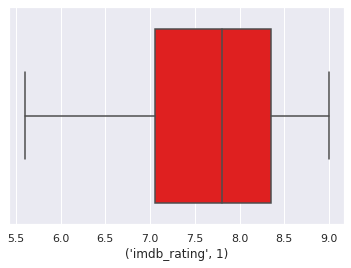

In [37]:
sns.boxplot(x = my_pivot2['imdb_rating', 1],
            whis = (0,100),
            color = 'red',
           )

## Conclusión a la pregunta: 
 Con esta tabla pivote logro obtener un dato fundamental que corresponde a conocer los ratings para cada pelicula, en base a el top que obtuvieron y al año en el que salieron. Además el boxplot me ayuda a corroborar que por lo general las películas con un mismo ranking en diferentes años, suelen obtener las mismas calificaciones.

## Pregunta de investigación 7: ¿Cual es el porcentaje de peliculas de cada clasificación (segun la edad)?

 Para esto realicé una gráfica de Pie, la cual me ayuda a conocer el porcentaje o porción que representa cada uno

In [17]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [18]:
import matplotlib as mpl
import plotly.express as px

In [19]:
counts = df['mpaa_rating'].value_counts()
counts = counts.to_frame()
counts['%'] = (counts.loc[:, 'mpaa_rating']/counts.loc[:, 'mpaa_rating'].sum(axis = 0))*100
counts


,mpaa_rating,%
PG-13,178,41.491841
PG,133,31.002331
R,95,22.144522
G,23,5.361305


In [20]:
counts = counts.reindex(['PG-13', 'PG', 'R', 'G'])
counts
counts = counts.reset_index()

In [21]:
counts = counts.rename({'index': 'Clasificacion'},
                       axis = 1
                      )
counts

,Clasificacion,mpaa_rating,%
0,PG-13,178,41.491841
1,PG,133,31.002331
2,R,95,22.144522
3,G,23,5.361305


Text(0.5, 1.0, 'Piechart of Clasification Age')

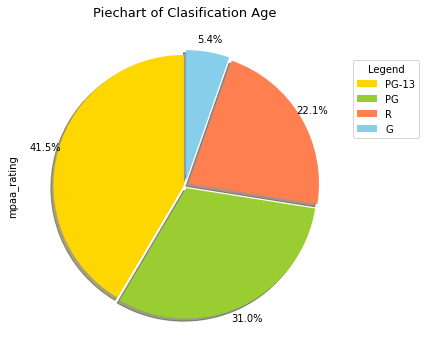

In [22]:
color_list = ['gold', 'yellowgreen','coral', 'skyblue']
explode_list = [0.01, 0.02, 0.03, 0.04]
counts['mpaa_rating'].plot(kind = 'pie',
                   figsize = (15, 6),
                   startangle = 90,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.1,
                   colors = color_list,
                   explode = explode_list,
                   shadow = True
                  )
plt.legend(labels = counts.Clasificacion,
           bbox_to_anchor = (1.0, 0.9),
           title = "Legend",
          )
plt.title ('Piechart of Clasification Age', fontsize = 13)

### Observaciones

* Pude notar que existen 4 tipos distintos de clasificaciones para las peliculas
* Existen mas peliculas PG-13 en el top 10 anual
* Existen menos peliculas G en el top 10 anual
## Conclusión a la pregunta: 
Con esta grafica PIE, pude identificar que dentro de las clasficaciones de peliculas, en base a la edad, la que mas se presenta dentro de la base de datos de las peliculas, es la de PG-13, lo que quiere decir que la mayor audiencia en estas peliculas como minimo tiene 13 años.

## Pregunta de investigación 8: ¿Cual es el impacto que tiene la variable de duración en la calificación de la pelicula?  ?

 Para esto tuve que realizar una regresión la cual me apoya directamente a conocer estos datos.

In [23]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn import linear_model
import statsmodels.api as sm

In [26]:
modelA = sm.OLS.from_formula('imdb_rating ~ length_in_min ', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     36.49
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.33e-09
Time:                        07:50:27   Log-Likelihood:                -497.07
No. Observations:                 430   AIC:                             998.1
Df Residuals:                     428   BIC:                             1006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.8782      0.202     29.123      0.000       5.482       6.275
length_in_min     0.0099      0.002      6.041      0.000       0.007       0.013
==============================================================================
Omnibus:                        8.962   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.188
Skew:                          -0.299   Prob(JB):                       0.0101
Kurtosis:                       3.394   Cond. No.                         667.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones:
* Variable dependiente: imbd_rating (Rating de pelicula)
* Variable independiente: lenght_in_min (duración en minutos)
* R-squared: 0.079; por lo tanto, este modelo no es  eficiente. Por que explica solamente el 7.9% del salario la variable age
* Df Model: 1
* intercept < 0.05, es estadisticamente significativo
* length_in_min < 0.05, es estadisticamente significativo

imdb_rating = 5.8782 + .0099 * length_in_min

Text(150, 10, 'imdb_rating = 5.8782 + .0099 * length_in_min')

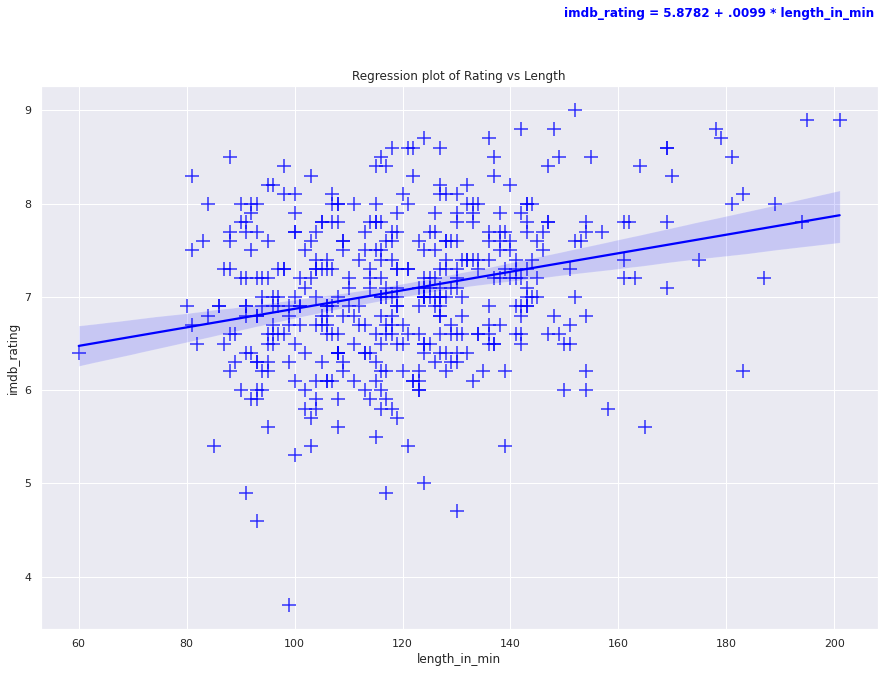

In [27]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1)

reg_plot = sns.regplot (x = 'length_in_min',
             y = 'imdb_rating',
             data = df,
             marker = '+',
             color = 'blue',
            scatter_kws = {'s':200}
            )
reg_plot.set_title('Regression plot of Rating vs Length')
reg_plot.text(150, 10, 'imdb_rating = 5.8782 + .0099 * length_in_min',
              color = 'blue',
              weight = 'semibold',
              size = 'medium'
             )

### Conclusiones: 
Como se puede observar por la gráfica obtenida, siguen una tendencia los valores hacia arriba, esto queriendo decir que entre mayor sea su numero de minutos, mas posibilidades sea de que el rating sea mayor

## Pregunta de investigación 9: ¿Cual es el comportamiento de los residuos de estas dos variables?

 Para esto tuve que calculos los residuos correspondientes y colocarlos en un diagrama de dispersion.

In [28]:
RESIA =resultA.resid
RESIA

0      0.823046
1     -0.050883
2      0.298181
3      0.439803
4     -0.200571
         ...   
425   -0.900571
426   -0.020447
427   -0.252131
428    1.197557
429   -1.051507
Length: 430, dtype: float64

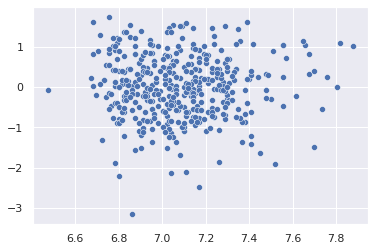

In [29]:
resi_plot = sns.scatterplot(x = resultA.fittedvalues,
                            y = RESIA)

### Observaciones:
* Se puede ver que existen residuos que se encuentran un tanto dispersos, pero la mayoría se encuentran mas alineados hacia la izquierda, un poco hacia arriba.

### Conclusión
La correlación que tienen estos residuos, por la forma de la gráfica, se acercara a un coeficiente de 0, debido a que no se comportan de forma normal.



### Limitaciones 
 Algunas de las limitaciones que me enfrente al realizar la manipulación de esta base de datos fueron primordialmente que en un principio el Jupiter no me dejaba manipular algunos datos, por lo que tuve que colocar la función de unicode.escape para poder utilizar la base de datos. Otra limitación fue a la hora de realizar la busqueda de las bases de datos, que se me hizo un tanto extensa.

 Otra gran limitación que se me presentó es que no pude utilizar las ultimas dos columnas, ya que solo considero como necesario el primer género, y algunas no se identifican con varios géneros distintos

## ¿Que me llevo?
Me llevo muchos aprendizajes de esta base de datos, me llevo algunos puntos críticos con relación a la duración, el año, el dinero invertido y la puntuación asignada para dicha pelicula.

Ademas me llevo el conocer herramientas de representaciones y de análisis de datos, dandome la oportunidad de comparar algunos datos para poder llegar a tomar decisiones sobre los impactos que unos datos pueden tener en otros.